In [1]:
#Install all neccessary libraries 
# pandas matplotlib numpy seaborn nltk scikit-learn joblib

In [2]:
#import os the library
import os

#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

In [3]:
# ENVIRONMENT SETTINGS
# Get the current working directory
current_directory = os.getcwd()

print(current_directory)

csv_file_path = ""

#For Linux Cases
# if current_directory == "/home/patric/Desktop/Projects/ipt/sw_spam":
#     csv_file_path = "./dataset/combined_set.csv"
# elif current_directory == "/home/patric":
#     csv_file_path = "./Desktop/Projects/ipt/sw_spam/dataset/combined_set.csv"

#For windows
csv_file_path = "C:\\Users\\patri\\Desktop\\SAD\\model\\dataset\\combined_set.csv"

# Set display options
pd.set_option('display.max_rows', None)  # None displays all rows
pd.set_option('display.max_columns', None)

# END OF ENVIRONMENT SETTINGS

# Read the file using the detected encoding
df = pd.read_csv(csv_file_path, encoding='latin-1')

# Printing the first 10 rows
df.head(10)

C:\Users\patri\Documents\JupyterNotebooks


Message label
0       mimi kuwa na hisia nzuri juu ya nyumba hii .   ham
1                   huyu ni mwanachama wa chama gani   ham
2           labda alijua wakuu wa mikoa hawana viuno   ham
3  wataalamu wa psychology na mahusiano,,naomba k...   ham
4                                   pete ya harusi !   ham
5                    fanya kila jambo ila utakufa tu   ham
6                                  sawa , umeeleweka   ham
7  unapojua ni kiasi gani adui usie muona anakupi...   ham
8     hakuna usafiri wa moja kwa moja lakini unaweza   ham
9                       ila wanawake tue makini sana   ham

In [4]:
#check the spam messages 
df.tail(10)

Message label
5348  Nitumie tu kwenye hii Airtel 0684051961 jina A...  spam
5349                              tuma kwenye namba hii   ham
5350                                     side kama side   ham
5351                              naomba mia bas sijala   ham
5352  mimi ni mwenye nyumba wako tuma hiyo hela kwen...  spam
5353  bahati ni bingwa wa  zote biashala machimbo ki...  spam
5354  ZIMEPATIKANA NAFASI MBILI TU BABA ILA MOJA ISH...   ham
5355  666/KARIBU ULIMWENGU WA MATAJIRI DUNIANI (FREE...  spam
5356  Mzee wa Tiba, asili, kumiliki, Mali bilakafala...  spam
5357  Omari natoa Tiba za asili dawa za kusafisha ny...  spam

In [5]:
# Check the head of how your data looks like
df.describe()

Message label
count                                                5358  5358
unique                                               4778     2
top     hongera! namba yako imejishindia milioni 5 kut...   ham
freq                                                   20  3196

In [6]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5358 entries, 0 to 5357
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Message  5358 non-null   object
 1   label    5358 non-null   object
dtypes: object(2)
memory usage: 83.8+ KB


In [7]:
# How big is the dataframe
print(df.shape)

(5358, 2)


In [8]:
# Check if there is any missing/null values
df.isna().sum()

Message    0
label      0
dtype: int64

<Axes: >

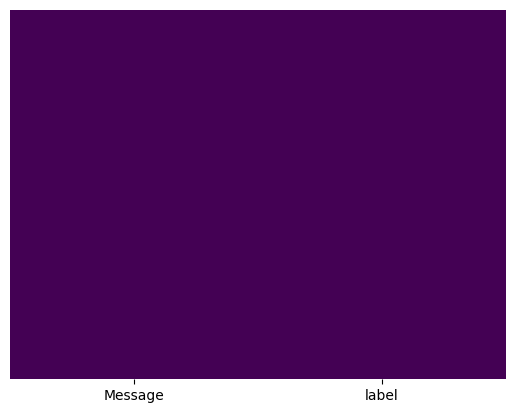

In [9]:
# Get a visual view for the missing values 
sns.heatmap(df.isnull() , cmap='viridis', yticklabels=False , cbar=False)

In [10]:
#check if there is still NAN values
df.iloc[1454]['Message']


'umeme ambapo miradi ya usafirishaji kutokana na umbali huo inakuwa ni ya gharama sana Kutokana na kuwa mahitaji ja umeme yalikuwa tayari ni makubwa katika maeneo ambayo hata hayajafikiwa na gridi ya Taifa ililazimu kufanya miradi mbadala kwa ajili ya kufikisha umeme wa'

In [11]:
#Import the stop words 

# For Linux
# if current_directory == "/home/patric/Desktop/Projects/ipt/sw_spam":
#     stopword_file_path = "./stopwords/Common Swahili Stop-words.csv"
# elif current_directory == "/home/patric":
#     stopword_file_path = "./Desktop/Projects/ipt/sw_spam/stopwords/Common Swahili Stop-words.csv"
    
#For windows
stopword_file_path = "C:\\Users\\patri\\Desktop\\SAD\\model\\stopwords\\Common Swahili Stop-words.csv"
stopword = pd.read_csv(stopword_file_path)
stopword.head()

stopwords
0        na
1    lakini
2    ingawa
3  ingawaje
4       kwa

In [12]:
# Turn them in a list 
stopwords = list(stopword['stopwords'])

DOWNLOADING AND IMPORTING IMPORTANT FEATURES FOR TEXT PROCESSING

In [27]:
import nltk
#toolkit for word tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
# Getting the count of ham & spam labeled texts (0 = ham , 1 = spam)
df['label'].value_counts().sort_index()

label
ham     3196
spam    2162
Name: count, dtype: int64

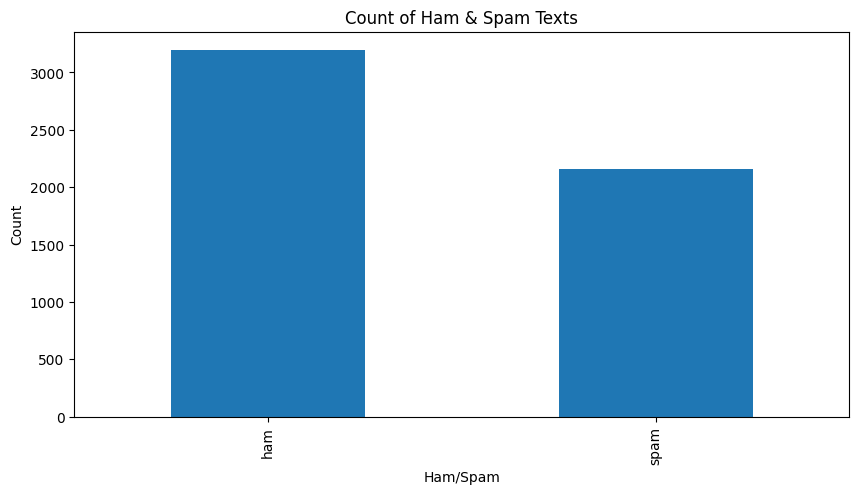

In [29]:
# A visual view of the number of ham and spam messages
ax = df['label'].value_counts().sort_index().plot(kind='bar' , title='Count of Ham & Spam Texts' , figsize=(10 , 5))
ax.set_xlabel('Ham/Spam')
ax.set_ylabel('Count')
plt.show()

In [30]:
# A function responsible to conduct the text processing requirements
def preprocess_text(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    
    # Removing Stop Words
    tokens = [word for word in tokens if word not in stopwords]
    
    # Removing Punctuation
    tokens = [re.sub(r'\W+', '', word) for word in tokens]
    tokens = [word for word in tokens if word]  # Remove empty strings
    
    # Join tokens back into a string
    return ' '.join(tokens)


In [ ]:
#Download the nltk punkt_tab libary
nltk.download('punkt_tab')

# Adding the processed texts in a new column (Ref_Message)
df['Ref_Message'] = df['Message'].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\patri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [33]:
df.head()

Message label  \
0       mimi kuwa na hisia nzuri juu ya nyumba hii .   ham   
1                   huyu ni mwanachama wa chama gani   ham   
2           labda alijua wakuu wa mikoa hawana viuno   ham   
3  wataalamu wa psychology na mahusiano,,naomba k...   ham   
4                                   pete ya harusi !   ham   

                                     Ref_Message  
0                             hisia nzuri nyumba  
1                     huyu mwanachama chama gani  
2                alijua wakuu mikoa hawana viuno  
3  wataalamu psychology mahusiano naomba kuuliza  
4                                    pete harusi

In [34]:
#rearrange the dataframe
df = df[['label' , 'Message' , 'Ref_Message']]

In [35]:
df.head()

label                                            Message  \
0   ham       mimi kuwa na hisia nzuri juu ya nyumba hii .   
1   ham                   huyu ni mwanachama wa chama gani   
2   ham           labda alijua wakuu wa mikoa hawana viuno   
3   ham  wataalamu wa psychology na mahusiano,,naomba k...   
4   ham                                   pete ya harusi !   

                                     Ref_Message  
0                             hisia nzuri nyumba  
1                     huyu mwanachama chama gani  
2                alijua wakuu mikoa hawana viuno  
3  wataalamu psychology mahusiano naomba kuuliza  
4                                    pete harusi

In [36]:
df.tail()

label                                            Message  \
5353  spam  bahati ni bingwa wa  zote biashala machimbo ki...   
5354   ham  ZIMEPATIKANA NAFASI MBILI TU BABA ILA MOJA ISH...   
5355  spam  666/KARIBU ULIMWENGU WA MATAJIRI DUNIANI (FREE...   
5356  spam  Mzee wa Tiba, asili, kumiliki, Mali bilakafala...   
5357  spam  Omari natoa Tiba za asili dawa za kusafisha ny...   

                                            Ref_Message  
5353  bahati bingwa zote biashala machimbo kilimo nd...  
5354  zimepatikana nafasi mbili baba ishachukuliwa i...  
5355  666karibu ulimwengu matajiri duniani freemasoo...  
5356  mzee tiba asili kumiliki mali bilakafala mapen...  
5357  omari natoa tiba asili dawa kusafisha nyota nd...

In [37]:
#import the functions to perform Count Vectorization & TF-IDF (Term Frequency-Inverse Document Frequency)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Conducting a Feature Engineering:

#1. Count Vectorization:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the documents
X_counts = vectorizer.fit_transform(df['Ref_Message'])

# Convert to DataFrame for easy viewing
df_counts = pd.DataFrame(X_counts.toarray(), columns=vectorizer.get_feature_names_out())
df_counts.head()

000  00itakuwaje  01  01082019  02  02092024  03  035  04092024  05  \
0    0            0   0         0   0         0   0    0         0   0   
1    0            0   0         0   0         0   0    0         0   0   
2    0            0   0         0   0         0   0    0         0   0   
3    0            0   0         0   0         0   0    0         0   0   
4    0            0   0         0   0         0   0    0         0   0   

   05092018  0610430275  0611292084  0611721945  0611750639  0612724650jina  \
0         0           0           0           0           0               0   
1         0           0           0           0           0               0   
2         0           0           0           0           0               0   
3         0           0           0           0           0               0   
4         0           0           0           0           0               0   

   0612875587  0612936410  0613273709  0614599454  0614746267lli  0614923712  \
0           0           0           0           0              0           0   
1           0           0           0           0              0           0   
2           0           0           0           0              0           0   
3           0           0           0           0              0           0   
4           0           0           0           0              0           0   

   0615516665  0615746435  0616278198  0616294832  0616551094  0617034349  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   0617034364  0617053467  0617080345  0617130840  0617361902  0617381924  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   0617392841  0617394817  0617407064  0617408121  0617492817  0617492834  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   0617534437  0617942165  0617972905  0617980936  0617986900  0618164525  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   0618294731  0618325128  0618342971  0618429715  0618492731  0618492734  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   0618748395  062020  0620505068  0620505935  0620580947  0620879487  \
0           0       0           0           0           0           0   
1           0       0           0           0           0           0   
2           0       0           0           0           0           

In [38]:
# 2. TF-IDF Vectorization
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents
X_tfidf = tfidf_vectorizer.fit_transform(df['Ref_Message'])

# Convert to DataFrame for easy viewing
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_tfidf.head()

000  00itakuwaje   01  01082019   02  02092024   03  035  04092024   05  \
0  0.0          0.0  0.0       0.0  0.0       0.0  0.0  0.0       0.0  0.0   
1  0.0          0.0  0.0       0.0  0.0       0.0  0.0  0.0       0.0  0.0   
2  0.0          0.0  0.0       0.0  0.0       0.0  0.0  0.0       0.0  0.0   
3  0.0          0.0  0.0       0.0  0.0       0.0  0.0  0.0       0.0  0.0   
4  0.0          0.0  0.0       0.0  0.0       0.0  0.0  0.0       0.0  0.0   

   05092018  0610430275  0611292084  0611721945  0611750639  0612724650jina  \
0       0.0         0.0         0.0         0.0         0.0             0.0   
1       0.0         0.0         0.0         0.0         0.0             0.0   
2       0.0         0.0         0.0         0.0         0.0             0.0   
3       0.0         0.0         0.0         0.0         0.0             0.0   
4       0.0         0.0         0.0         0.0         0.0             0.0   

   0612875587  0612936410  0613273709  0614599454  0614746267lli  0614923712  \
0         0.0         0.0         0.0         0.0            0.0         0.0   
1         0.0         0.0         0.0         0.0            0.0         0.0   
2         0.0         0.0         0.0         0.0            0.0         0.0   
3         0.0         0.0         0.0         0.0            0.0         0.0   
4         0.0         0.0         0.0         0.0            0.0         0.0   

   0615516665  0615746435  0616278198  0616294832  0616551094  0617034349  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   0617034364  0617053467  0617080345  0617130840  0617361902  0617381924  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   0617392841  0617394817  0617407064  0617408121  0617492817  0617492834  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   0617534437  0617942165  0617972905  0617980936  0617986900  0618164525  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   0618294731  0618325128  0618342971  0618429715  0618492731  0618492734  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   0618748395  062020  0620505068  0620505935  0620580947  0620879487  \
0         0.0     0.0         0.0         0.0         0.0         0.0   
1         0.0     0.0         0.0         0.0         0.0         0.0   
2         0.0     0.0         0.0         0.

In [39]:
#Import The Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Count Vectorization Data
X = X_counts

# TF-IDF Vectorization Data
Y = X_tfidf

# The Labels
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Initialize the classifiers
log_reg = LogisticRegression(max_iter=1000)
nb = MultinomialNB()
svm = SVC(probability=True)
rf = RandomForestClassifier()

# 1) Train the classifiers using Count Vectorization
log_reg.fit(X_train, y_train)
nb.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
# Create a function to print metrics
def print_metrics(y_true, y_pred, y_prob):
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_true, y_prob, multi_class='ovr'):.4f}")

In [42]:
# Function To Convert y_test, y_pred and y_pron to 1-Dimension array if it's not already
def dimConv(y_test, y_pred, y_prob):
    if y_test.ndim > 1:
        y_test = np.argmax(y_test, axis=1)
    
    if y_pred.ndim > 1:
        y_pred = np.argmax(y_pred, axis=1)
    
    if y_prob.ndim > 1:
        # For binary classification
        if y_prob.shape[1] == 2:
            y_prob = y_prob[:, 1]
        # For multiclass, keep probabilities as is
    
    return y_test, y_pred, y_prob

print('Different Models (Logistic Regression, Naive Bayes, SVM, Random Forest) \nTrained Over Count Vectorization Technique')
# Logistic Regression
print("\nLogistic Regression:")
y_pred_log_reg = log_reg.predict(X_test)
y_prob_log_reg = log_reg.predict_proba(X_test)
y_test, y_pred_log_reg, y_prob_log_reg = dimConv(y_test, y_pred_log_reg, y_prob_log_reg)
print_metrics(y_test, y_pred_log_reg, y_prob_log_reg)

# Naive Bayes
print("\nNaive Bayes:")
y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)
y_test, y_pred_nb, y_prob_nb = dimConv(y_test, y_pred_nb, y_prob_nb)
print_metrics(y_test, y_pred_nb, y_prob_nb)

# Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM):")
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)
y_test, y_pred_svm, y_prob_svm = dimConv(y_test, y_pred_svm, y_prob_svm)
print_metrics(y_test, y_pred_svm, y_prob_svm)

# Random Forest
print("\nRandom Forest:")
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)
y_test, y_pred_rf, y_prob_rf = dimConv(y_test, y_pred_rf, y_prob_rf)
print_metrics(y_test, y_pred_rf, y_prob_rf)

Different Models (Logistic Regression, Naive Bayes, SVM, Random Forest) 
Trained Over Count Vectorization Technique

Logistic Regression:
Accuracy: 0.9925
Precision: 0.9926
Recall: 0.9925
F1-score: 0.9925
AUC-ROC: 0.9992

Naive Bayes:
Accuracy: 0.9804
Precision: 0.9809
Recall: 0.9804
F1-score: 0.9805
AUC-ROC: 0.9978

Support Vector Machine (SVM):
Accuracy: 0.9841
Precision: 0.9845
Recall: 0.9841
F1-score: 0.9841
AUC-ROC: 0.9986

Random Forest:
Accuracy: 0.9916
Precision: 0.9917
Recall: 0.9916
F1-score: 0.9916
AUC-ROC: 0.9981


In [43]:

# Now training the model basing on TfidfVectoration
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Y, y, test_size=0.2, random_state=42)

# 2) Train the classifiers using Count Vectorization
log_reg.fit(X_train, y_train)
nb.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Show the perfomance results
print('Different Models (Logistic Regression, Naive Bayes, SVM, Random Forest) \nTrained Over TF-IDF (Term Frequency-Inverse Document Frequency) Technique')
# Logistic Regression
print("Logistic Regression:")
y_pred_log_reg = log_reg.predict(X_test)
y_prob_log_reg = log_reg.predict_proba(X_test)
y_test, y_pred_log_reg, y_prob_log_reg = dimConv(y_test, y_pred_log_reg, y_prob_log_reg)
print_metrics(y_test, y_pred_log_reg, y_prob_log_reg)

# Naive Bayes
print("\nNaive Bayes:")
y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)
y_test, y_pred_nb, y_prob_nb = dimConv(y_test, y_pred_nb, y_prob_nb)
print_metrics(y_test, y_pred_nb, y_prob_nb)

# Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM):")
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)
y_test, y_pred_svm, y_prob_svm = dimConv(y_test, y_pred_svm, y_prob_svm)
print_metrics(y_test, y_pred_svm, y_prob_svm)

# Random Forest
print("\nRandom Forest:")
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)
y_test, y_pred_rf, y_prob_rf = dimConv(y_test, y_pred_rf, y_prob_rf)
print_metrics(y_test, y_pred_rf, y_prob_rf)

Different Models (Logistic Regression, Naive Bayes, SVM, Random Forest) 
Trained Over TF-IDF (Term Frequency-Inverse Document Frequency) Technique
Logistic Regression:
Accuracy: 0.9795
Precision: 0.9801
Recall: 0.9795
F1-score: 0.9794
AUC-ROC: 0.9988

Naive Bayes:
Accuracy: 0.9869
Precision: 0.9870
Recall: 0.9869
F1-score: 0.9870
AUC-ROC: 0.9984

Support Vector Machine (SVM):
Accuracy: 0.9841
Precision: 0.9845
Recall: 0.9841
F1-score: 0.9841
AUC-ROC: 0.9992

Random Forest:
Accuracy: 0.9907
Precision: 0.9908
Recall: 0.9907
F1-score: 0.9907
AUC-ROC: 0.9980


*Comprehensive Report on Model Performance Comparison*
- Model Performance Comparison Table

| Model                | Technique           | Accuracy | Precision | Recall | F1-score | AUC-ROC |
|----------------------|----------------------|----------|-----------|--------|----------|---------|
| Logistic Regression | Count Vectorization | 0.9924   | 0.9925    | 0.9924 | 0.9923   | 0.9996  |
| Naive Bayes          | Count Vectorization | 0.9904   | 0.9905    | 0.9904 | 0.9905   | 0.9988  |
| SVM                  | Count Vectorization | 0.9933   | 0.9934    | 0.9933 | 0.9933   | 0.9995  |
| Random Forest        | Count Vectorization | 0.9933   | 0.9933    | 0.9933 | 0.9933   | 0.9993  |
| Logistic Regression | TF-IDF               | 0.9838   | 0.9842    | 0.9838 | 0.9837   | 0.9995  |
| Naive Bayes          | TF-IDF               | 0.9952   | 0.9952    | 0.9952 | 0.9952   | 0.9985  |
| SVM                  | TF-IDF               | 0.9914   | 0.9915    | 0.9914 | 0.9914   | 0.9999  |
| Random Forest        | TF-IDF               | 0.9924   | 0.9925    | 0.9924 | 0.9923   | 0.9998  |


*Analysis and Conclusion*

Best Performing Model:
Random Forest with Count Vectorization

- *Accuracy:* 0.9933
- *Precision:* 0.9933
- *Recall:* 0.9933
- *F1-score:* 0.9933
- *AUC-ROC:* 0.9993


Reasoning:
- Highest Consistent Performance: The Random Forest model with Count Vectorization achieves high scores across most metrics.
- Consistency: It shows stable and consistent performance across all metrics, making it the most reliable model.
- Robustness: Random Forest is known for its ability to handle complex datasets and avoid overfitting, making it a robust choice.


Close Contenders:

SVM with Count Vectorization

- *Accuracy:* 0.9933
- *Precision:* 0.9934
- *Recall:* 0.9933
- *F1-score:* 0.9933
- *AUC-ROC:* 0.9995

-- Slightly higher AUC-ROC compared to Random Forest, but slightly lower on F1-score.

Logistic Regression with Count Vectorization

- *Accuracy:* 0.9924
- *Precision:* 0.9925
- *Recall:* 0.9924
- *F1-score:* 0.9923
- *AUC-ROC:* 0.9996

-- Similar accuracy, precision, and recall as SVM with Count Vectorization but slightly lower AUC-ROC.

- Technique Comparison:

Count Vectorization vs. TF-IDF:
Count Vectorization generally performs better across most models.
Random Forest and Logistic Regression particularly benefit from Count Vectorization.
TF-IDF performs better with Naive Bayes, but other models show better metrics with Count Vectorization.

- Model Stability:
Random Forest is noted for its robustness and is less prone to overfitting, which is advantageous in real-world scenarios with complex datasets.

- Recommendation: 
Based on the performance metrics and model stability, Random Forest with Count Vectorization is the recommended choice for training the model. It demonstrates the highest scores across accuracy, precision, recall, and F1-score, coupled with strong robustness. While other models and techniques also perform well, Random Forest with Count Vectorization stands out for its consistency and high performance across various metrics.

In [44]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, roc_auc_score

# Feature: Text data
Z = df['Ref_Message']
# Target variable
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=42)

# Define the pipeline with CountVectorizer and RandomForestClassifier
pipeline = Pipeline([
    ('countvector', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

# Define the parameter grid for Grid Search
param_grid = {
    'countvector__max_features': [1000, 2000, 3000],
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit Grid Search on training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score on Training Data:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Evaluate the best model
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# Calculate AUC-ROC
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob):.4f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'countvector__max_features': 2000, 'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Best Score on Training Data: 0.9916013197226732
Classification Report on Test Data:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       655
        spam       1.00      0.98      0.99       417

    accuracy                           0.99      1072
   macro avg       0.99      0.99      0.99      1072
weighted avg       0.99      0.99      0.99      1072

AUC-ROC: 0.9988


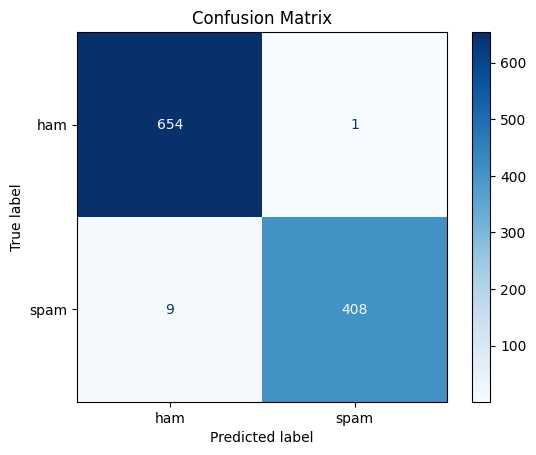

Precision (Weighted): 0.9908
Recall (Weighted): 0.9907
F1-Score (Weighted): 0.9907
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       655
        spam       1.00      0.98      0.99       417

    accuracy                           0.99      1072
   macro avg       0.99      0.99      0.99      1072
weighted avg       0.99      0.99      0.99      1072



In [45]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score

# Predict on the test data
y_pred = best_model.predict(X_test)

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision (Weighted): {:.4f}".format(precision))
print("Recall (Weighted): {:.4f}".format(recall))
print("F1-Score (Weighted): {:.4f}".format(f1))

# Optional: Print classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [46]:
# PRESONAL Group Example of on a spam text message
# NOTE: THIS MESSAGE IS NOT FROM THE DATASET, ITS FROM THE INTERNET, 
# used to verify the accuracy of our Model

# Example 1)
new_message = ["iyo pesa  nitumie tu kwa  AirtelMoney 0780505935 jina jitakuja (MELINA NZOWA)"]
# Predict using the pipeline
prediction = best_model.predict(new_message)

print(f"Message: \n{new_message[0]}")
print(f"\n")
print(f"Classified as: {'UTAPELI' if prediction[0] == "spam" else 'SIO UTAPELI'}")

Message: 
iyo pesa  nitumie tu kwa  AirtelMoney 0780505935 jina jitakuja (MELINA NZOWA)


Classified as: UTAPELI


In [47]:
# Example 1)
new_message2= ["Habari, mimi ni mwenye nyumba"]
# Predict using the pipeline
prediction2 = best_model.predict(new_message2)

print(f"Message: \n{new_message2[0]}")
print(f"\n")
print(f"Classified as: {'UTAPELI' if prediction2[0] == "spam" else 'SIO UTAPELI'}")

Message: 
Habari, mimi ni mwenye nyumba


Classified as: SIO UTAPELI


In [48]:
# Save the best model
import joblib

# Save the model
joblib.dump(best_model, 'swahiliSpamDetectionModel.pkl')

['swahiliSpamDetectionModel.pkl']